In [2]:
import pandas_datareader.data as web
import numpy as np
import pandas as pd

stock = ['AAPL']

data = web.DataReader(stock,data_source="yahoo",start='01/01/2010')['Adj Close']

data.sort_index(inplace=True)

returns = data.pct_change()

mean_return = returns.mean()
return_stdev = returns.std()

annualised_return = round(mean_return * 252,2)
annualised_stdev = round(return_stdev * np.sqrt(252),2)

print ('The annualised mean return of stock {} is {}, ' 
        'and the annualised volatility is {}'.format(stock[0],annualised_return,annualised_stdev))


The annualised mean return of stock AAPL is Symbols
AAPL    0.27
dtype: float64, and the annualised volatility is Symbols
AAPL    0.26
dtype: float64


In [8]:
#list of stocks in portfolio
#NOTE THAT THESE MUST BE ENTERED IN ALPHABETICAL ORDER FOR THE RESULTS TO BE CORRECT!!!
stocks = ['AAPL','GOOGL','MSFT','AMZN','FB','BABA','JNJ','JPM','BAC','WMT']

#download daily price data for each of the stocks in the portfolio
data = web.DataReader(stocks,data_source='yahoo',start='01/01/2010')['Adj Close']

data.sort_index(inplace=True)

#convert daily stock prices into daily returns
returns = data.pct_change()

#calculate mean daily return and covariance of daily returns
mean_daily_returns = returns.mean()
cov_matrix = returns.cov()

#set array holding portfolio weights of each stock
weights = np.asarray([0.1]*10)

#calculate annualised portfolio return
portfolio_return = round(np.sum(mean_daily_returns * weights) * 252,2)
#calculate annualised portfolio volatility
portfolio_std_dev = round(np.sqrt(np.dot(weights.T,np.dot(cov_matrix, weights))) * np.sqrt(252),2)

print('Portfolio expected annualised return is {} and volatility is {}'.format(portfolio_return,portfolio_std_dev))

Portfolio expected annualised return is 0.28 and volatility is 0.21


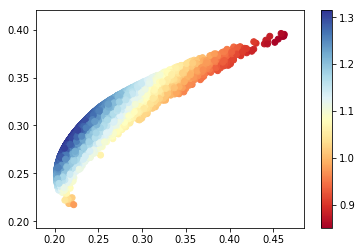

In [9]:
import numpy as np
import pandas as pd
import pandas_datareader.data as web
import matplotlib.pyplot as plt


#list of stocks in portfolio
stocks = ['AAPL','GOOGL','MSFT','AMZN','FB','BABA','JNJ','JPM','BAC','WMT']

#download daily price data for each of the stocks in the portfolio
data = web.DataReader(stocks,data_source='yahoo',start='01/01/2010')['Adj Close']

data.sort_index(inplace=True)

#convert daily stock prices into daily returns
returns = data.pct_change()

#calculate mean daily return and covariance of daily returns
mean_daily_returns = returns.mean()
cov_matrix = returns.cov()

#set number of runs of random portfolio weights
num_portfolios = 25000

#set up array to hold results
results = np.zeros((3,num_portfolios))


for i in range(num_portfolios):
    #select random weights for portfolio holdings
    weights = np.random.random(4)
    #rebalance weights to sum to 1
    weights /= np.sum(weights)
    
    #calculate portfolio return and volatility
    portfolio_return = np.sum(mean_daily_returns * weights) * 252
    portfolio_std_dev = np.sqrt(np.dot(weights.T,np.dot(cov_matrix, weights))) * np.sqrt(252)
    
    #store results in results array
    results[0,i] = portfolio_return
    results[1,i] = portfolio_std_dev
    #store Sharpe Ratio (return / volatility) - risk free rate element excluded for simplicity
    results[2,i] = results[0,i] / results[1,i]

#convert results array to Pandas DataFrame
results_frame = pd.DataFrame(results.T,columns=['ret','stdev','sharpe'])

#create scatter plot coloured by Sharpe Ratio
plt.scatter(results_frame.stdev,results_frame.ret,c=results_frame.sharpe,cmap='RdYlBu')
plt.colorbar()

 
Two portfolios that we may like to highlight as being “special” are 1) the portfolio with the highest Sharpe Ratio (i.e. the highest risk adjusted returns) and 2) The “minimum variance portfolio” which is the portfolio with the lowest volatility.

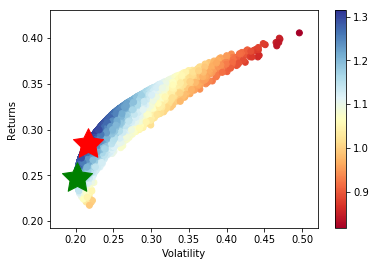

In [11]:
import numpy as np
import pandas as pd
import pandas_datareader.data as web
import matplotlib.pyplot as plt


#list of stocks in portfolio
stocks = ['AAPL','GOOGL','MSFT','AMZN','FB','BABA','JNJ','JPM','BAC','WMT']

#download daily price data for each of the stocks in the portfolio
data = web.DataReader(stocks,data_source='yahoo',start='01/01/2010')['Adj Close']

data.sort_index(inplace=True)

#convert daily stock prices into daily returns
returns = data.pct_change()

#calculate mean daily return and covariance of daily returns
mean_daily_returns = returns.mean()
cov_matrix = returns.cov()

#set number of runs of random portfolio weights
num_portfolios = 25000

#set up array to hold results
#We have increased the size of the array to hold the weight values for each stock
results = np.zeros((4+len(stocks)-1,num_portfolios))

for i in range(num_portfolios):
    #select random weights for portfolio holdings
    weights = np.array(np.random.random(4))
    #rebalance weights to sum to 1
    weights /= np.sum(weights)
    
    #calculate portfolio return and volatility
    portfolio_return = np.sum(mean_daily_returns * weights) * 252
    portfolio_std_dev = np.sqrt(np.dot(weights.T,np.dot(cov_matrix, weights))) * np.sqrt(252)
    
    #store results in results array
    results[0,i] = portfolio_return
    results[1,i] = portfolio_std_dev
    #store Sharpe Ratio (return / volatility) - risk free rate element excluded for simplicity
    results[2,i] = results[0,i] / results[1,i]
    #iterate through the weight vector and add data to results array
    for j in range(len(weights)):
        results[j+3,i] = weights[j]

#convert results array to Pandas DataFrame
results_frame = pd.DataFrame(results.T,columns=['ret','stdev','sharpe',stocks[0],stocks[1],stocks[2],stocks[3]])

#locate position of portfolio with highest Sharpe Ratio
max_sharpe_port = results_frame.iloc[results_frame['sharpe'].idxmax()]
#locate positon of portfolio with minimum standard deviation
min_vol_port = results_frame.iloc[results_frame['stdev'].idxmin()]

#create scatter plot coloured by Sharpe Ratio
plt.scatter(results_frame.stdev,results_frame.ret,c=results_frame.sharpe,cmap='RdYlBu')
plt.xlabel('Volatility')
plt.ylabel('Returns')
plt.colorbar()
#plot red star to highlight position of portfolio with highest Sharpe Ratio
plt.scatter(max_sharpe_port[1],max_sharpe_port[0],marker=(5,1,0),color='r',s=1000)
#plot green star to highlight position of minimum variance portfolio
plt.scatter(min_vol_port[1],min_vol_port[0],marker=(5,1,0),color='g',s=1000)

In [26]:
sharpe_shares = [share*100 for share in list(max_sharpe_port)[3:13]]

In [33]:
print("percentage of shares for maximum Sharpe Ratio are below")
for i range(len(stocks)):
    print(stocks[i]+" - {}\n ".format(sharpe_shares[i])

percentage of shares for maximum Sharpe Ratio are below
AAPL - 37.683444572504186 
AMZN - 24.80379119572503 
MSFT - 23.389380561414814 
TSLA - 14.12338367035597


In [36]:
volatile_shares = [share*100 for share in list(min_vol_port)[3:7]]

In [38]:
print("percentage of shares for maximum Sharpe Ratio are below")
for i range(len(stocks)):
    print(stocks[i]+" - {}\n ".format(volatile_shares[i])

percentage of shares for minimum Volatility  are below
AAPL - 32.483536156851365 
AMZN - 11.461879425395988 
MSFT - 52.67295383305297 
TSLA - 3.3816305846996584
